In [2]:
import numpy as np
from keras.models import load_model
from keras.utils import load_img,img_to_array, to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD,Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from keras.models import load_model
from keras.layers.convolutional import MaxPooling2D,Conv2D
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
trainset='van_ban'
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [4]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(64,64),
                                     batch_size=64,
                                     class_mode='categorical',
                                     subset="training"
                                     )
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(64,64),
                                              batch_size=64,
                                              class_mode='categorical',
                                              subset="validation"
                                             )

Found 538 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [16]:
print(train_dataset.class_indices)


{'NTV': 0, 'TV': 1}


In [5]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(384,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(384,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [18]:
opt=Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy'
,optimizer=opt,metrics=['accuracy'])

In [19]:
history=model.fit(train_dataset,batch_size=64,epochs=10,verbose=1,validation_data=validation_set)


Epoch 1/10
9/9 [==============================] - 22s 2s/step - loss: 45.4021 - accuracy: 0.5706 - val_loss: 0.6924 - val_accuracy: 0.5593
Epoch 2/10
9/9 [==============================] - 23s 3s/step - loss: 0.6921 - accuracy: 0.5428 - val_loss: 0.6924 - val_accuracy: 0.5593
Epoch 3/10
9/9 [==============================] - 21s 2s/step - loss: 0.6898 - accuracy: 0.5502 - val_loss: 0.6878 - val_accuracy: 0.5593
Epoch 4/10
9/9 [==============================] - 20s 2s/step - loss: 0.6878 - accuracy: 0.5502 - val_loss: 0.6859 - val_accuracy: 0.5593
Epoch 5/10
9/9 [==============================] - 22s 2s/step - loss: 0.6908 - accuracy: 0.5483 - val_loss: 0.6909 - val_accuracy: 0.5593
Epoch 6/10
9/9 [==============================] - 22s 2s/step - loss: 0.6908 - accuracy: 0.5558 - val_loss: 0.6871 - val_accuracy: 0.5593
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.6905 - accuracy: 0.5520 - val_loss: 0.6867 - val_accuracy: 0.5593
Epoch 8/10
9/9 [=================

In [20]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

1/1 [==============================] - 1s 758ms/step - loss: 0.6883 - accuracy: 0.5593
test accuracy =  0.5593220591545105


In [21]:
model_save= model.save("model_fix_64.h5")

In [3]:
model=load_model('model_fix_224.h5')

In [5]:
classes={ 0:'TV',1:'NTV'} 

1/1 [==============================] - 0s 388ms/step
NTV
1/1 [==============================] - 0s 96ms/step
[[2.1582358e-22 1.0000000e+00]]


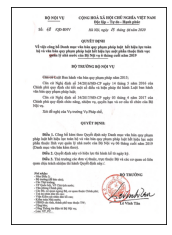

In [6]:

url='van_ban/NTV/Ảnh chụp màn hình 2022-06-16 201834 - Copy.png' # hình ảnh văn bản ngôn ngữ khác
url2='van_ban/TV/48.jpg' # hình ảnh vb tiếng việt
plt.imshow(load_img(url2))
img=load_img(url2,target_size=(224,224))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,224,224,3)
print(classes[np.argmax(model.predict(img))])
print(model.predict(img))